# Research on Predicting residential electricity consumption patterns based on smart meter and household data in UK

Load and Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv('LCL-June2015v2_99.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC004221,Std,2013-08-06 07:00:00.0000000,0.046
1,MAC004221,Std,2013-08-06 07:30:00.0000000,0.04
2,MAC004221,Std,2013-08-06 08:00:00.0000000,0.016
3,MAC004221,Std,2013-08-06 08:30:00.0000000,0.018
4,MAC004221,Std,2013-08-06 09:00:00.0000000,0.016


In [4]:
df.columns

Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   LCLid                    1000000 non-null  object
 1   stdorToU                 1000000 non-null  object
 2   DateTime                 1000000 non-null  object
 3   KWH/hh (per half hour)   1000000 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [6]:
df.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,1000000,1000000,1000000,1000000
unique,36,1,30995,2893
top,MAC004233,Std,2012-10-20 00:00:00.0000000,0.032
freq,31007,1000000,68,11405


In [7]:
# Check for missing values
df.isnull().sum()

,0
LCLid,0
stdorToU,0
DateTime,0
KWH/hh (per half hour),0


In [8]:
df_cleaned = df.copy()

In [9]:
# Convert DateTime to datetime format and extract hour and day features
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'], format='%Y-%m-%d', errors='coerce') # Added format and errors arguments
df_cleaned['hour'] = df_cleaned['DateTime'].dt.hour
df_cleaned['day'] = df_cleaned['DateTime'].dt.day

In [10]:
# Drop the original DateTime and LCLid columns as they are not useful for modeling
df_cleaned = df_cleaned.drop(columns=['DateTime', 'LCLid'])

In [11]:
# Summary statistics of the dataset
df_cleaned.describe()

,hour,day
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [12]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

In [ ]:
# Assuming the column name is correct after checking
df_cleaned = df_cleaned.dropna(subset=['KWH/hh (per half hour) '])

#Proceed with data analysis and modeling
X = df_cleaned[['stdorToU']]
y = df_cleaned['KWH/hh (per half hour) ']

# Data Visualizations

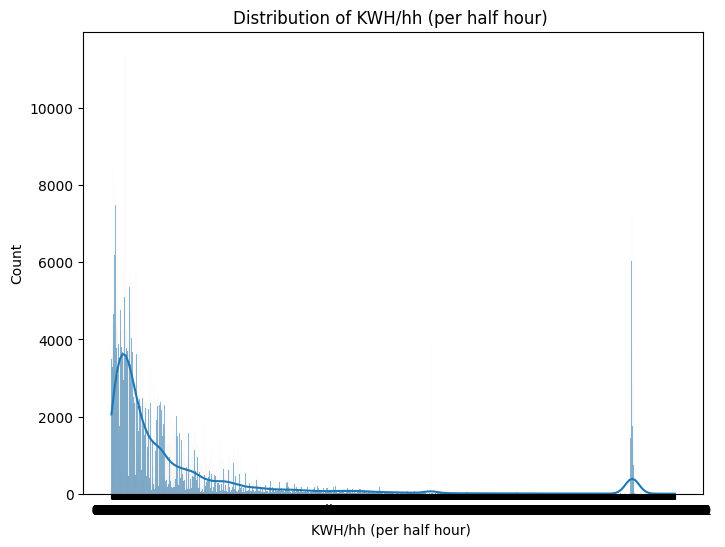

In [15]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['KWH/hh (per half hour) '], kde=True)
plt.title('Distribution of KWH/hh (per half hour) ')
plt.show()


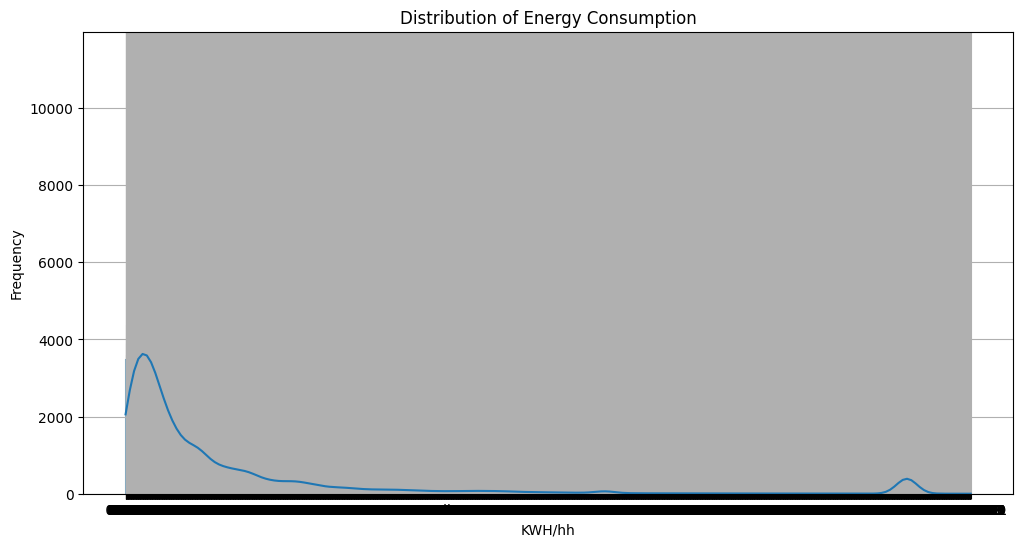

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['KWH/hh (per half hour) '], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('KWH/hh')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [26]:
# Preprocess the data
# 1. Convert 'DateTime' to pandas datetime object and extract useful features like hour, day, month, etc.
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

In [27]:
# Drop any rows where DateTime conversion failed
df = df.dropna(subset=['DateTime'])

In [28]:
# Extract relevant time features
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.weekday

In [34]:
# Convert 'KWH/hh (per half hour)' to numeric (it's currently a string, and there may be bad values)
df['KWH/hh'] = pd.to_numeric(df['KWH/hh (per half hour)'], errors='coerce')

In [35]:
# Drop rows with missing KWH values
df = df.dropna(subset=['KWH/hh'])

In [36]:
# Select relevant features and target variable
features = ['Hour', 'Day', 'Month', 'Weekday']
target = 'KWH/hh'

In [37]:
X = df[features]
y = df[target]

In [38]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Now we can proceed to implement the three models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [41]:
# Initialize the models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

In [42]:
# Train the models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_forest = random_forest.predict(X_test)

In [44]:
# Evaluate the models
mae_linear = mean_absolute_error(y_test, y_pred_linear)

In [45]:
print(f"Linear Regression MAE: {mae_linear}")

Linear Regression MAE: 0.170091807381988


In [46]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)

In [47]:
print(f"Decision Tree MAE: {mae_tree}")

Decision Tree MAE: 0.16995188657803273


In [48]:
mae_forest = mean_absolute_error(y_test, y_pred_forest)

In [49]:
print(f"Random Forest MAE: {mae_forest}")

Random Forest MAE: 0.169981016871287


In [50]:
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [51]:
print(f"Linear Regression MSE: {mse_linear}")

Linear Regression MSE: 0.07669674456626946


In [52]:
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [53]:
print(f"Decision Tree MSE: {mse_tree}")

Decision Tree MSE: 0.0760680989061876


In [54]:
mse_forest = mean_squared_error(y_test, y_pred_forest)

In [55]:
print(f"Random Forest MSE: {mse_forest}")

Random Forest MSE: 0.07608802809820861


In [57]:
# Create a dictionary to store the MAE and MSE values for each model
model_metrics = {
    'Linear Regression': {'MAE': mae_linear, 'MSE': mse_linear},
    'Decision Tree': {'MAE': mae_tree, 'MSE': mse_tree},
    'Random Forest': {'MAE': mae_forest, 'MSE': mse_forest}
}

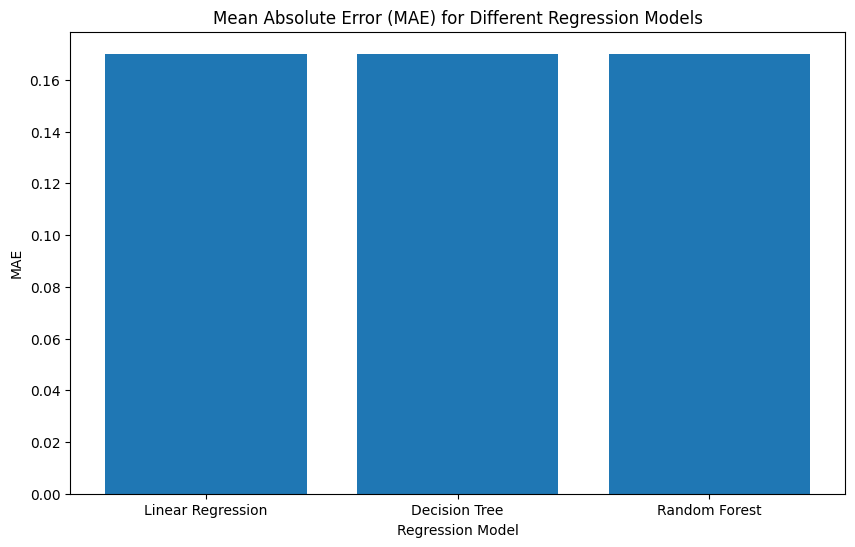

In [58]:
# Create a bar plot for MAE
plt.figure(figsize=(10, 6))
plt.bar(model_metrics.keys(), [metrics['MAE'] for metrics in model_metrics.values()])
plt.title('Mean Absolute Error (MAE) for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('MAE')
plt.show()

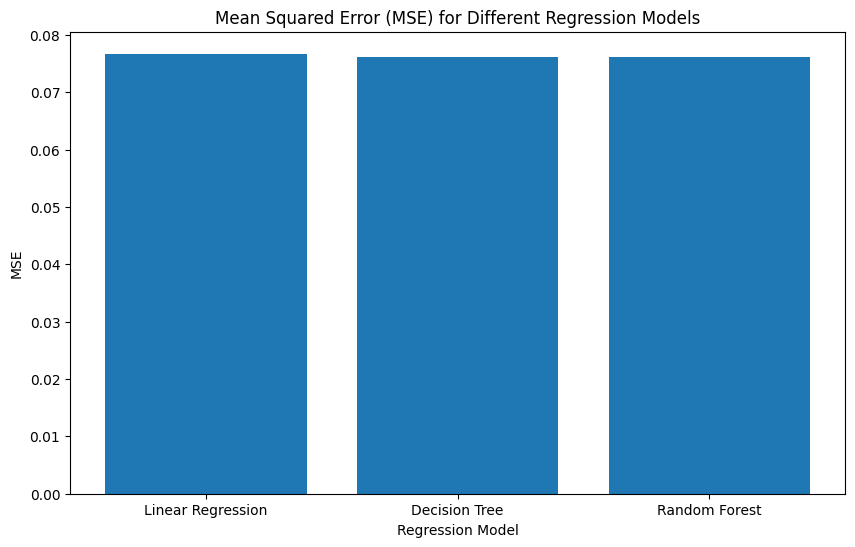

In [59]:
# Create a bar plot for MSE
plt.figure(figsize=(10, 6))
plt.bar(model_metrics.keys(), [metrics['MSE'] for metrics in model_metrics.values()])
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('MSE')
plt.show()